[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mohamed-Mehira/AI-computer-vision/blob/master/Tensorflow/LinearRegression.ipynb)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

E:\Softwares\anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
# import data

# https://archive.ics.uci.edu/ml/datasets/Auto_MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
# clean data
dataset = dataset.dropna()

# Convert categorical "Origin" data into one-hot encoded data
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

dataset

C:\Users\mohme\AppData\Local\Temp\ipykernel_7428\191527292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['USA'] = (origin == 1)*1
C:\Users\mohme\AppData\Local\Temp\ipykernel_7428\191527292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Europe'] = (origin == 2)*1
C:\Users\mohme\AppData\Local\Temp\ipykernel_7428\191527292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [5]:
# Split the data into training and testing
train_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(train_data.index)

print(dataset.shape, train_data.shape, test_data.shape)
train_data.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [6]:
# Split features from labels
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1,0,0
282,4,140.0,88.0,2890.0,17.3,79,1,0,0
69,8,350.0,160.0,4456.0,13.5,72,1,0,0
378,4,105.0,63.0,2125.0,14.7,82,1,0,0
331,4,97.0,67.0,2145.0,18.0,80,0,0,1
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,1,0,0
229,8,400.0,180.0,4220.0,11.1,77,1,0,0
150,4,108.0,93.0,2391.0,15.5,74,0,0,1
145,4,83.0,61.0,2003.0,19.0,74,0,0,1


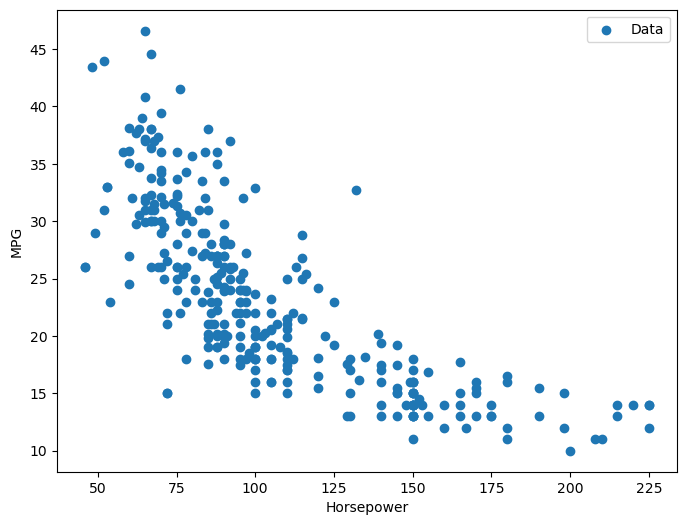

In [7]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Prediction')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()
    
plot('Horsepower')

## Regression
   1. Normalize the input data
   2. Apply a linear transformation (y=m*x+b) to produce 1 output using layers.Dense

In [8]:
feature = 'Horsepower'
single_feature = train_features[feature]

## 1. Normalization
# single_feature_normalizer = preprocessing.Normalization()  # not working
single_feature_normalizer = layers.Normalization(input_shape=[1,], axis=None)

# adapt to the data
single_feature_normalizer.adapt(np.array(single_feature))
print(single_feature_normalizer(single_feature[0]).numpy())

## or:
# single_feature = (single_feature - np.min(single_feature)) / (np.max(single_feature) - np.min(single_feature))

[0.661]


In [9]:
## 2. Sequential model
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(1)  # Linear Model
])

single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [31]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError()  # or MeanSquaredError
optimizer = keras.optimizers.Adam(learning_rate=0.1)

single_feature_model.compile(optimizer, loss)

In [26]:
history = single_feature_model.fit(
    single_feature, train_labels,
    epochs=50, verbose=1,
    validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 0s 16ms/step - loss: 3.8155 - accuracy: 0.0000e+00 - val_loss: 4.1753 - val_accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 3.8119 - accuracy: 0.0000e+00 - val_loss: 4.1999 - val_accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 3.8056 - accuracy: 0.0000e+00 - val_loss: 4.1886 - val_accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 3.8057 - accuracy: 0.0000e+00 - val_loss: 4.1781 - val_accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 3.8130 - accuracy: 0.0000e+00 - val_loss: 4.2008 - val_accuracy: 0.0000e+00
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 3.8034 - accuracy: 0.0000e+00 - val_loss: 4.1897 - val_accuracy: 0.0000e+00
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 3.8081 - accuracy: 0.0000e+00 - val_loss: 4.1750 - va

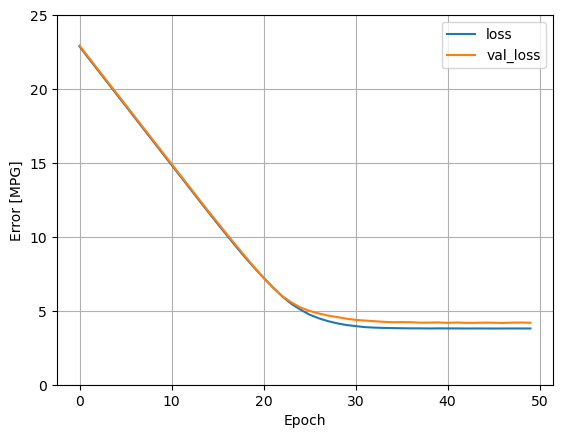

In [12]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [13]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 3.6593


3.6592602729797363

13/13 [==============================] - 0s 1ms/step


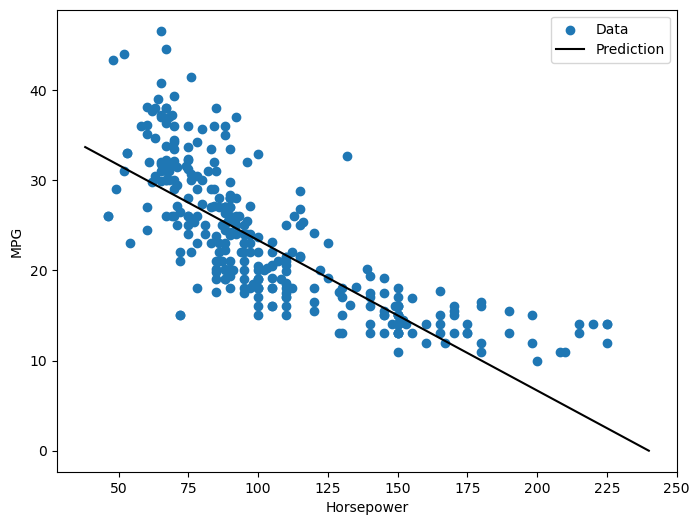

In [14]:
## Predict and Plot

# expanding the range of input values (x) aka increasing the resolution of the plot
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 400)
x = x[:, tf.newaxis]
y = single_feature_model.predict(x)

plot(feature, x, y)

## DNN

In [32]:
dnn_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

dnn_model.compile(optimizer=keras.optimizers.Adam(0.001), loss=loss)

dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 64)                128       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [33]:
dnn_model.fit(
    single_feature, train_labels,
    epochs=75, verbose=1,
    validation_split=0.2)

Epoch 1/75
8/8 [==============================] - 0s 15ms/step - loss: 23.0968 - val_loss: 23.5017
Epoch 2/75
8/8 [==============================] - 0s 5ms/step - loss: 22.8994 - val_loss: 23.2813
Epoch 3/75
8/8 [==============================] - 0s 6ms/step - loss: 22.6666 - val_loss: 22.9981
Epoch 4/75
8/8 [==============================] - 0s 6ms/step - loss: 22.3694 - val_loss: 22.6369
Epoch 5/75
8/8 [==============================] - 0s 6ms/step - loss: 21.9860 - val_loss: 22.1737
Epoch 6/75
8/8 [==============================] - 0s 6ms/step - loss: 21.4977 - val_loss: 21.5767
Epoch 7/75
8/8 [==============================] - 0s 6ms/step - loss: 20.8567 - val_loss: 20.8090
Epoch 8/75
8/8 [==============================] - 0s 6ms/step - loss: 20.0342 - val_loss: 19.8141
Epoch 9/75
8/8 [==============================] - 0s 7ms/step - loss: 18.9644 - val_loss: 18.5890
Epoch 10/75
8/8 [==============================] - 0s 7ms/step - loss: 17.7233 - val_loss: 17.1563
Epoch 11/75
8/8 [=

In [17]:
dnn_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 2.9372


2.9372169971466064

13/13 [==============================] - 0s 1ms/step


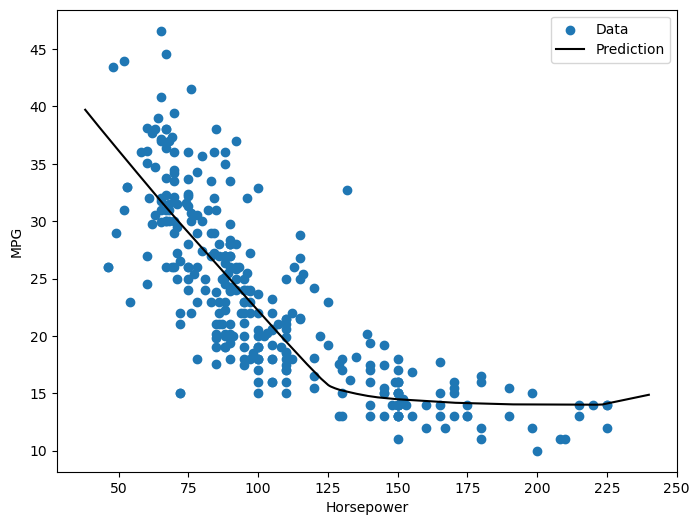

In [18]:
y = dnn_model.predict(x)

plot(feature, x, y)

# Multiple Features (inputs)

In [19]:
# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

# when the layer is called it returns the input data, with each feature independently normalized:
# (input - mean) / stddev

first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
     0.197]]
First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [20]:
linear_model = keras.models.Sequential([
    normalizer,
    layers.Dense(1)
])

linear_model.compile(optimizer, loss)

linear_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [23]:
linear_model.fit(
    train_features, train_labels,
    epochs=25, verbose=1,
    validation_split=0.2)

Epoch 1/25
8/8 [==============================] - 0s 9ms/step - loss: 2.5319 - val_loss: 2.4589
Epoch 2/25
8/8 [==============================] - 0s 6ms/step - loss: 2.5054 - val_loss: 2.4790
Epoch 3/25
8/8 [==============================] - 0s 5ms/step - loss: 2.4864 - val_loss: 2.4555
Epoch 4/25
8/8 [==============================] - 0s 6ms/step - loss: 2.4829 - val_loss: 2.4567
Epoch 5/25
8/8 [==============================] - 0s 6ms/step - loss: 2.4752 - val_loss: 2.4663
Epoch 6/25
8/8 [==============================] - 0s 6ms/step - loss: 2.5000 - val_loss: 2.4522
Epoch 7/25
8/8 [==============================] - 0s 6ms/step - loss: 2.5128 - val_loss: 2.5037
Epoch 8/25
8/8 [==============================] - 0s 6ms/step - loss: 2.4802 - val_loss: 2.4487
Epoch 9/25
8/8 [==============================] - 0s 5ms/step - loss: 2.5110 - val_loss: 2.5110
Epoch 10/25
8/8 [==============================] - 0s 6ms/step - loss: 2.5039 - val_loss: 2.5021
Epoch 11/25
8/8 [======================

In [24]:
linear_model.evaluate(
    test_features,
    test_labels, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 2.5424


2.542410135269165